In [1]:
%load_ext autoreload

In [2]:
%autoreload
import sys
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec

sys.path.append('../src/')
from indicators import *

%matplotlib inline

Read a dataframe that has only EU organisations and includes:
* People working in the EU
* Their degrees, job, ethnicity, gender

In [3]:
df = pd.read_csv('../data/processed/ojpd_eu.csv')

In [4]:
df['founded_on'] = df.founded_on.apply(lambda x: x[:4] if isinstance(x, str) else x)

## Very basic EDA

In [22]:
df.job_type.isnull().sum()

135232

In [23]:
df.job_type.value_counts()

executive         499852
employee          251979
board_member       91955
advisor            31735
board_observer      4411
Name: job_type, dtype: int64

In [5]:
# Missing values
df.isnull().sum() / df.shape[0]

org_id                 0.000000
funding_total_usd      0.605069
founded_on             0.076816
city                   0.000000
country                0.000000
employee_count         0.163605
primary_role           0.000000
job_id                 0.133212
is_current             0.133212
job_type               0.133212
category_group_list    0.093809
person_id              0.133236
first_name             0.133236
last_name              0.133236
gender                 0.153906
race                   0.133236
degree_type            0.652828
degree_id              0.600524
institution_id         0.600524
dtype: float64

In [6]:
print('NUMBER OF UNIQUE EU COMPANIES: {}'.format(df[df.primary_role=='company'].org_id.unique().shape[0]))
print('NUMBER OF UNIQUE WORKERS IN EU COMPANIES: {}'.format(df.person_id.unique().shape[0]))

NUMBER OF UNIQUE EU COMPANIES: 122536
NUMBER OF UNIQUE WORKERS IN EU COMPANIES: 175645


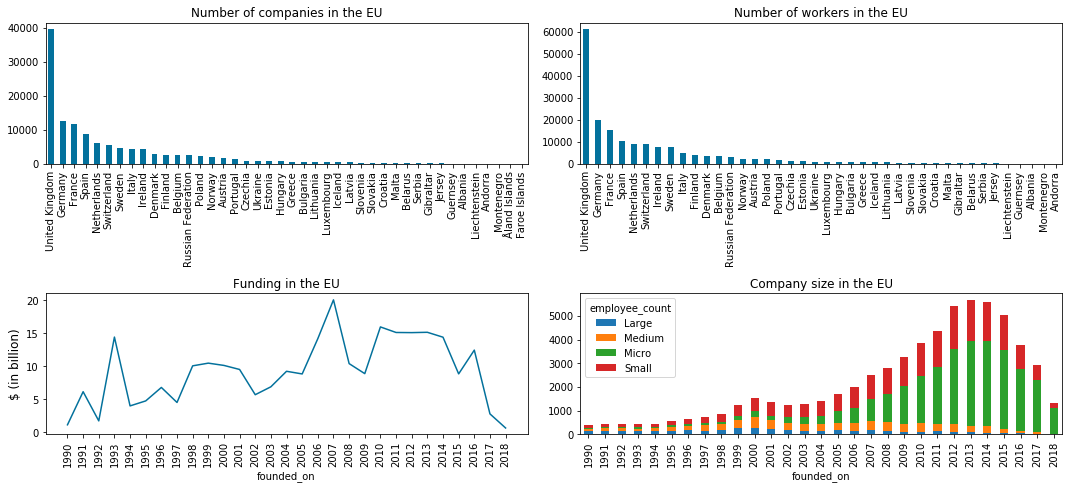

In [7]:
f = plt.figure(figsize=(15,10))
gs = gridspec.GridSpec(3, 2)

# ax1
ax1 = plt.subplot(gs[0, :1])
df[df.primary_role=='company'].drop_duplicates('org_id').country.value_counts().plot(kind='bar', color='xkcd:ocean blue', ax=ax1)
ax1.set_title('Number of companies in the EU', fontsize=12)

# ax2
ax2 = plt.subplot(gs[0, 1:])
df.drop_duplicates('person_id').country.value_counts().plot(kind='bar', color='xkcd:ocean blue', ax=ax2)
ax2.set_title('Number of workers in the EU', fontsize=12)

# ax3
ax3 = plt.subplot(gs[1, :1])
funding = df[df.primary_role=='company'].drop_duplicates('org_id').groupby('founded_on').sum()['funding_total_usd'].loc['1990':, ] / 1000000000
funding.plot(color='xkcd:ocean blue', ax=ax3)
ax3.set_xticks(range(len(funding.index)))
ax3.set_xticklabels(list(funding.index), rotation=90)
ax3.set_title('Funding in the EU', fontsize=12)
ax3.set_ylabel('$ (in billion)', fontsize=12) 

# ax4
ax4 = plt.subplot(gs[1, 1:])
comp_size = df[df.primary_role=='company'].drop_duplicates('org_id').groupby(['founded_on', 'employee_count']).count()['org_id'].loc['1990':, ]
comp_size.unstack('employee_count').plot(kind='bar', stacked=True, ax=ax4)
ax4.set_xticks(range(len(comp_size.unstack('employee_count').index)))
ax4.set_xticklabels(list(comp_size.unstack('employee_count').index), rotation=90)
ax4.set_title('Company size in the EU', fontsize=12)

plt.tight_layout()
plt.show()

## Indicators

In [ ]:
country_gender = ind.people_diversity('country', 'gender')

In [4]:
ind = Indicators(df)

# 1. Gender diversity (city level)
country_gender = ind.people_diversity('country', 'gender')

# 2. Ethnic diversity (city level)
country_ethnicity = ind.people_diversity('country', 'race')

# 3. Gender distribution for degrees
degree_gender = ind.degree_diversity('country', 'degree_type', 'gender')

# 4. Ethnic distribution for degrees
degree_ethnicity = ind.degree_diversity('country', 'degree_type', 'race')

# 5. Gender distribution for degrees - city level
city_degree_gender = ind.degree_diversity('city', 'degree_type', 'gender', city_level=True, country='United Kingdom')

# 6. Ethnic distribution for degrees - city level
city_degree_ethnicity = ind.degree_diversity('city', 'degree_type', 'race', city_level=True, country='United Kingdom')

# 7. Gender diversity in roles
role_comp_gender = ind.city_role_company('country', 'job_type', 'gender')

# 8. Ethnic diversity in roles
role_comp_ethnicity = ind.city_role_company('country', 'job_type', 'race')

# 9. Gender diversity in categories (city level)
cat_comp_gender = ind.city_role_company('country', 'category_group_list', 'gender')

# 10. Ethnic diversity in categories (city level)
cat_comp_ethnicity = ind.city_role_company('country', 'category_group_list', 'race')

# 11. Gender diversity in categories
cat_gender = ind.city_role_company('category_group_list', 'gender')

# 12. Ethnic diversity in categories
cat_ethnicity = ind.city_role_company('category_group_list', 'race')

# 13. Lieberson index (intersectionality) - city level
data_formatting = ind.lieberson_format(['gender', 'race'], city_level=True, country='United Kingdom', thresh=500)
lieberson_index_cities = {k:ind.lieberson_index(v) for k, v in data_formatting.items()}

# 14. Lieberson index (intersectionality) - country level
data_formatting = ind.lieberson_format(['gender', 'race'], country_level=True, thresh=1000)
lieberson_index_countries = {k:ind.lieberson_index(v) for k, v in data_formatting.items()}

# 15. Studied at home vs abroad
work_and_study_place = {country:ind.home_study(country) for country in df.country.unique()}

# 16. Simpson diversity - country level, gender
simpson_gender_country = ind.simpson_index(type='gender', thresh=1000, country_level=True)

# 17. Simpson diversity - country level, ethnicity
simpson_ethnic_country = ind.simpson_index(type='race', thresh=1000, country_level=True)

# 18. Simpson diversity - city level, ethnicity
simpson_ethnic_city = ind.simpson_index(type='race', thresh=500, country='United Kingdom')

# 19. Simpson diversity - city level, gender
simpson_gender_city = ind.simpson_index(type='gender', thresh=500, country='United Kingdom')

# 20. Ethnic diversity in gender
country_race_gender = ind.city_role_company('country', 'race', 'gender')

# Visualisation

### Indicators 1 & 2

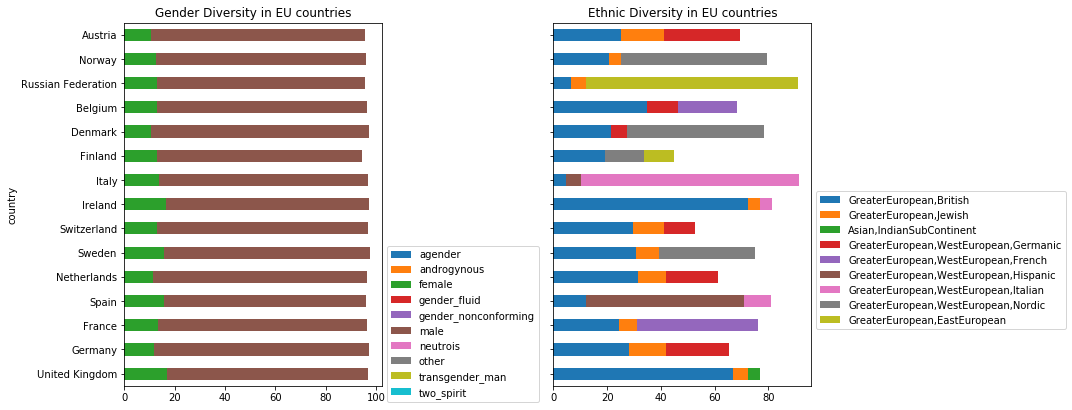

In [132]:
f = plt.figure(figsize=(15,6))
gs = gridspec.GridSpec(1, 2)

# ax1
ax1 = plt.subplot(gs[0, 0])
country_gender.unstack('gender').iloc[:15].plot(kind='barh', stacked=True, ax=ax1, legend=False)
ax1.set_title('Gender Diversity in EU countries', fontsize=12)
ax1.legend(bbox_to_anchor=(1, 0.4))

# ax2
ax2 = plt.subplot(gs[0, 1])
d = {}
for country in country_ethnicity.unstack('race').index[:15]:
    d[country] = country_ethnicity.unstack('race').loc[country].nlargest(n=3)
pd.DataFrame.from_dict(d, orient='index').reindex(country_gender.unstack('gender').index[:15]).plot(kind='barh', stacked=True, ax=ax2)
ax2.set_title('Ethnic Diversity in EU countries', fontsize=12)
ax2.set_yticklabels([])
ax2.set_ylabel('')
ax2.legend(bbox_to_anchor=(1, 0.55))

plt.tight_layout()
plt.show()

### Indicators 3, 4, 5, 6, 7, 8, 9 & 10

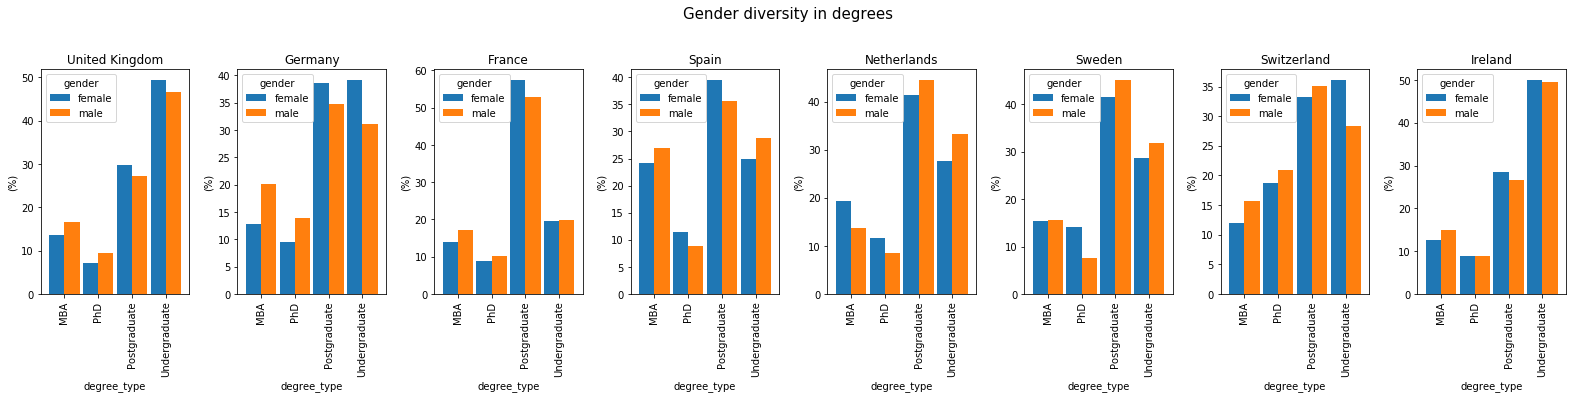

In [43]:
fig = plt.figure(figsize=(22, 5))
gs = gridspec.GridSpec(1,8)
for i, country in enumerate(degree_gender.index.levels[0][:8]):
    ax = plt.subplot(gs[0,i])
    degree_gender.loc[country].unstack('gender')[['female', 'male']].plot(kind='bar', width=0.9, ax=ax)
    ax.set_title('{}'.format(country))
    ax.set_ylabel('(%)')

plt.suptitle('Gender diversity in degrees', fontsize=15, y=1.1)
plt.tight_layout()
plt.show()

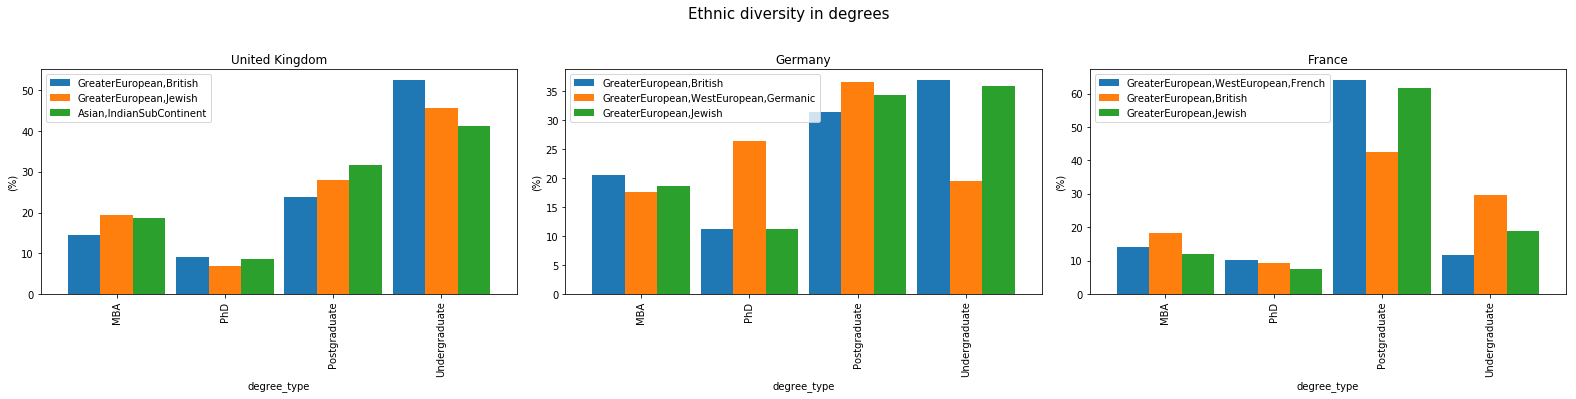

In [82]:
fig = plt.figure(figsize=(22, 5))
gs = gridspec.GridSpec(1,3)
for i, country in enumerate(degree_ethnicity.index.levels[0][:3]):
    ax = plt.subplot(gs[0,i])
    degree_ethnicity.loc[country].unstack('race')[[v for v in df[df.country==country].race.value_counts().index.values[:3]]].plot(kind='bar', width=0.9, ax=ax)
    ax.legend(loc='best')
    ax.set_title('{}'.format(country))
    ax.set_ylabel('(%)')

plt.suptitle('Ethnic diversity in degrees', fontsize=15, y=1.1)
plt.tight_layout()
plt.show()

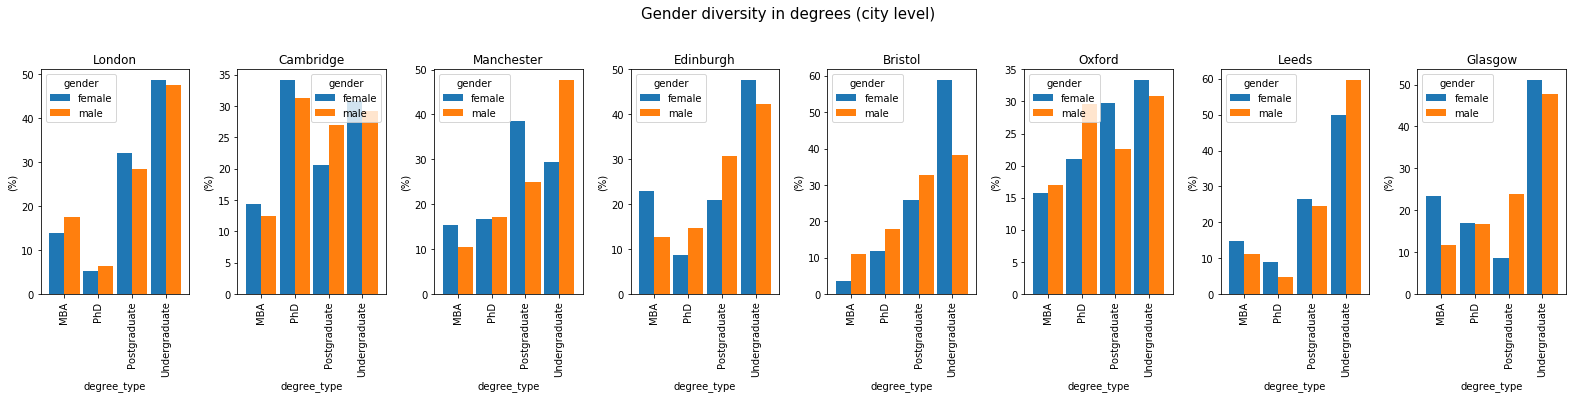

In [12]:
fig = plt.figure(figsize=(22, 5))
gs = gridspec.GridSpec(1,8)
for i, country in enumerate(city_degree_gender.index.levels[0][:8]):
    ax = plt.subplot(gs[0,i])
    city_degree_gender.loc[country].unstack('gender')[['female', 'male']].plot(kind='bar', width=0.9, ax=ax)
    ax.set_title('{}'.format(country))
    ax.set_ylabel('(%)')

plt.suptitle('Gender diversity in degrees (city level)', fontsize=15, y=1.1)
plt.tight_layout()
plt.show()

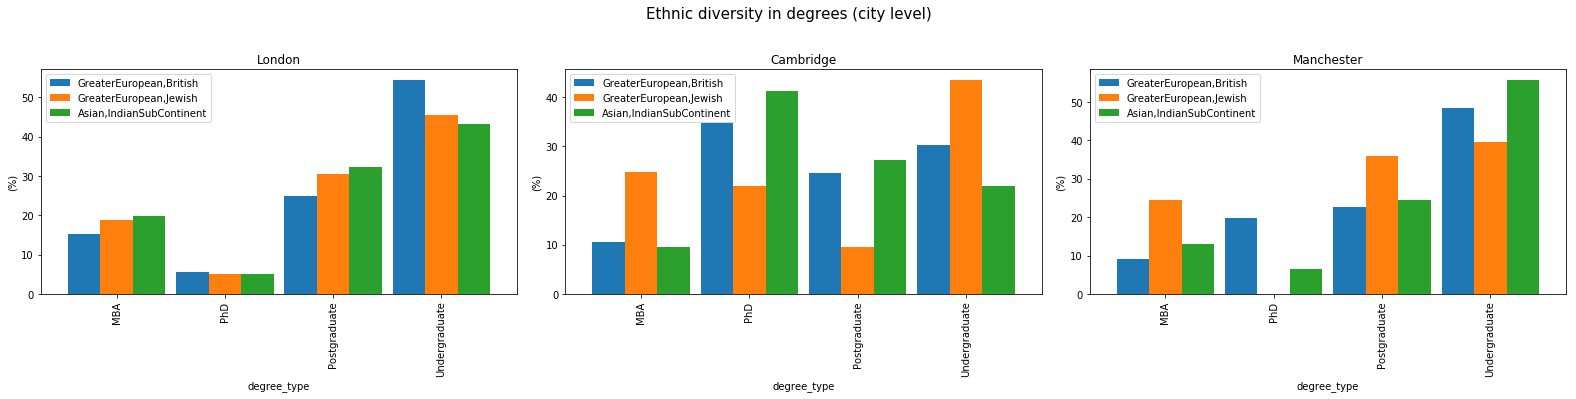

In [94]:
fig = plt.figure(figsize=(22, 5))
gs = gridspec.GridSpec(1,3)
for i, country in enumerate(city_degree_ethnicity.index.levels[0][:3]):
    ax = plt.subplot(gs[0,i])
    city_degree_ethnicity.loc[country].unstack('race')[[v for v in df[df.city==country].race.value_counts().index.values[:3]]].plot(kind='bar', width=0.9, ax=ax, legend=False)
    ax.legend(loc='best')
    ax.set_title('{}'.format(country))
    ax.set_ylabel('(%)')

plt.suptitle('Ethnic diversity in degrees (city level)', fontsize=15, y=1.1)
plt.tight_layout()
plt.show()

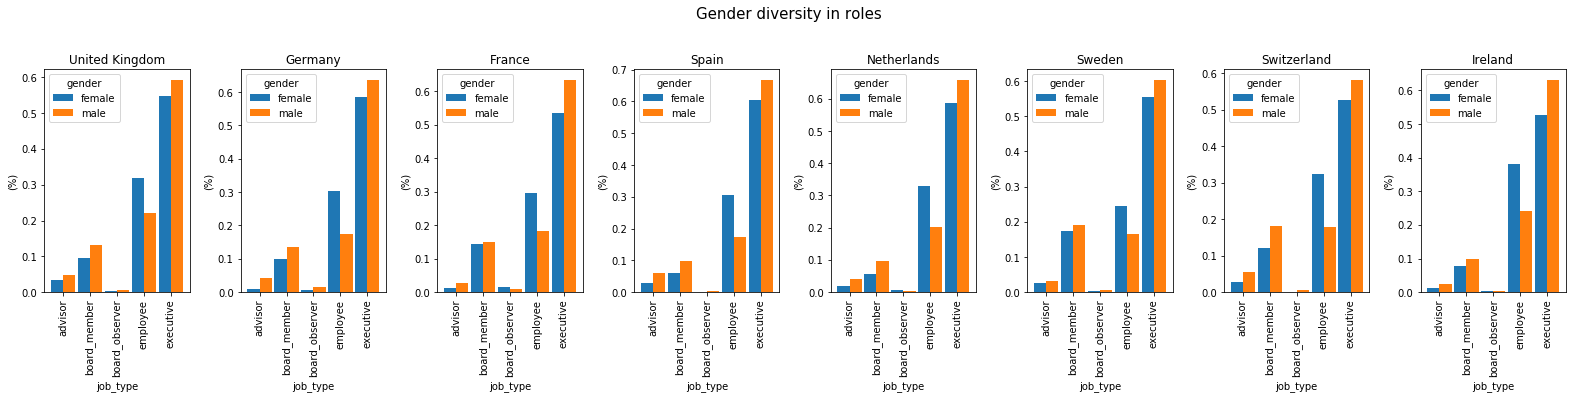

In [14]:
fig = plt.figure(figsize=(22, 5))
gs = gridspec.GridSpec(1,8)
for i, country in enumerate(degree_gender.index.levels[0][:8]):
    ax = plt.subplot(gs[0,i])
    role_comp_gender.loc[country].unstack('gender')[['female', 'male']].plot(kind='bar', width=0.9, ax=ax)
    ax.set_title('{}'.format(country))
    ax.set_ylabel('(%)')

plt.suptitle('Gender diversity in roles', fontsize=15, y=1.1)
plt.tight_layout()
plt.show()

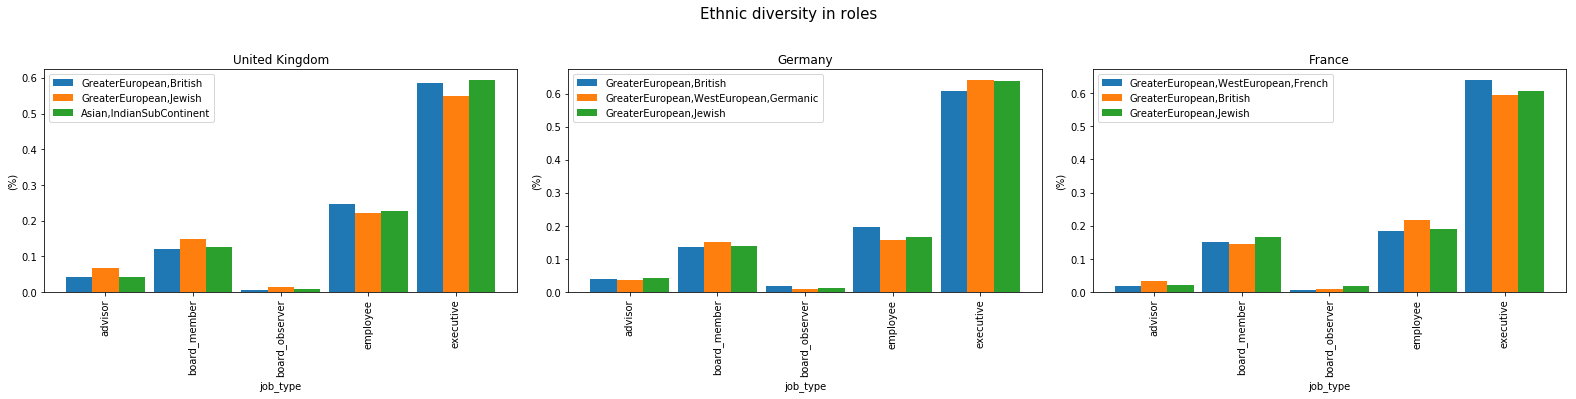

In [97]:
fig = plt.figure(figsize=(22, 5))
gs = gridspec.GridSpec(1,3)
for i, country in enumerate(degree_gender.index.levels[0][:3]):
    ax = plt.subplot(gs[0,i])
    role_comp_ethnicity.loc[country].unstack('race')[[v for v in df[df.country==country].race.value_counts().index.values[:3]]].plot(kind='bar', width=0.9, ax=ax, legend=False)
    ax.set_title('{}'.format(country))
    ax.legend(loc='best')
    ax.set_ylabel('(%)')

plt.suptitle('Ethnic diversity in roles', fontsize=15, y=1.1)
plt.tight_layout()
plt.show()

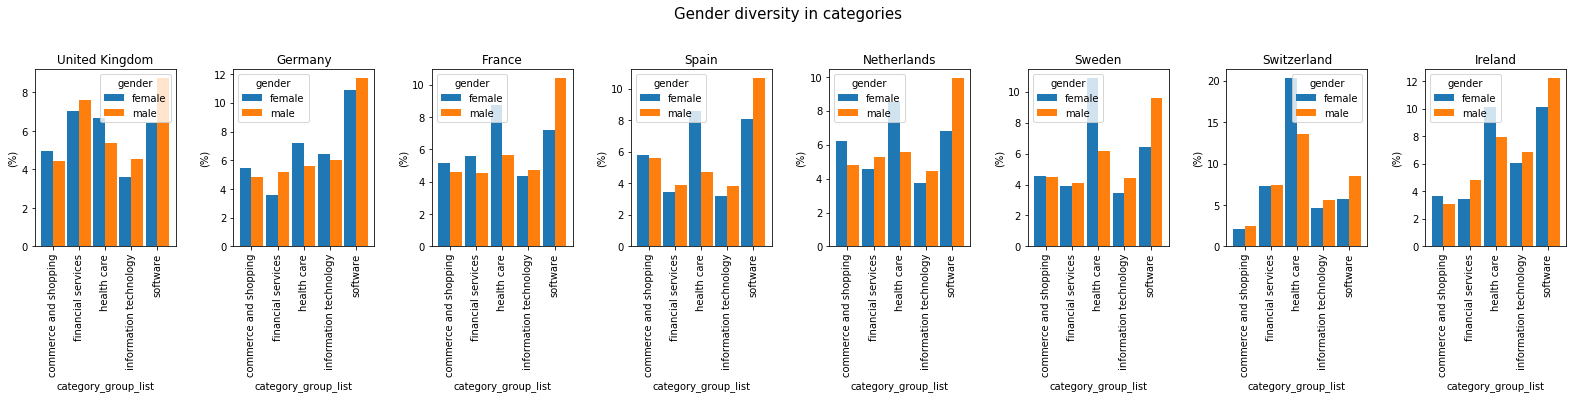

In [14]:
cats = df.drop_duplicates('org_id')['category_group_list'].value_counts().index[:5]
fig = plt.figure(figsize=(22, 5))
gs = gridspec.GridSpec(1,8)
for i, country in enumerate(degree_gender.index.levels[0][:8]):
    ax = plt.subplot(gs[0,i])
    cat_comp_gender.loc[country].loc[cats].unstack('gender')[['female', 'male']].plot(kind='bar', width=0.9, ax=ax)
    ax.set_title('{}'.format(country))
    ax.set_ylabel('(%)')

plt.suptitle('Gender diversity in categories', fontsize=15, y=1.1)
plt.tight_layout()
plt.show()

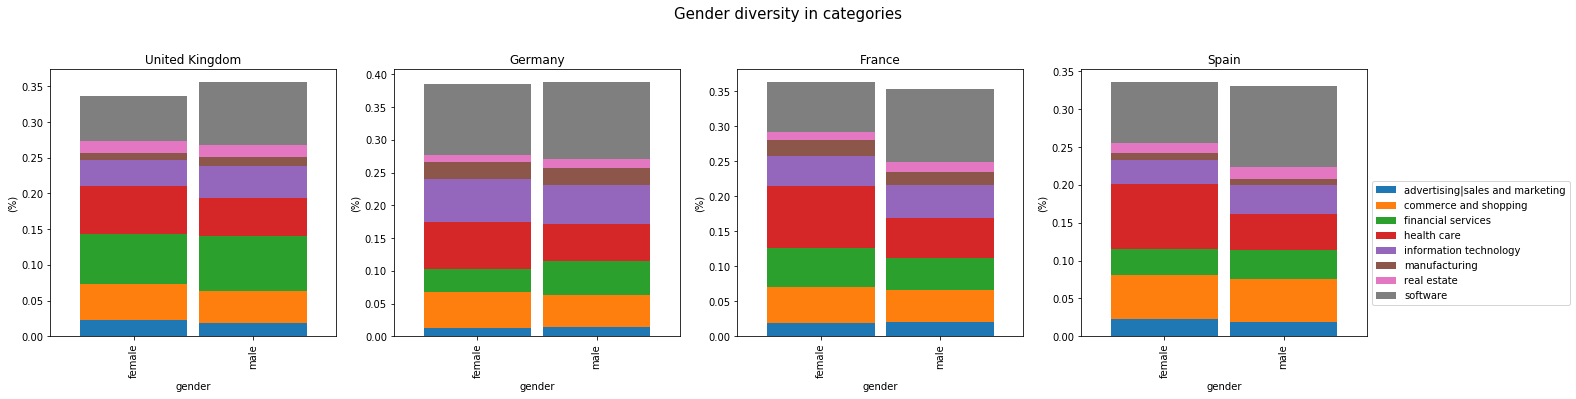

In [36]:
cats = df.drop_duplicates('org_id')['category_group_list'].value_counts().index[:8]
fig = plt.figure(figsize=(22, 5))
gs = gridspec.GridSpec(1,4)
for i, country in enumerate(degree_gender.index.levels[0][:4]):
    ax = plt.subplot(gs[0,i])
    cat_comp_gender.loc[country].loc[cats].unstack('category_group_list').loc[['female', 'male']].plot(kind='bar', width=0.9, ax=ax, stacked=True, legend=False)
    ax.set_title('{}'.format(country))
    ax.set_ylabel('(%)')
    
    if i == 3:
        ax.legend(bbox_to_anchor=(1, 0.6))

plt.suptitle('Gender diversity in categories', fontsize=15, y=1.1)
plt.tight_layout()
plt.show()

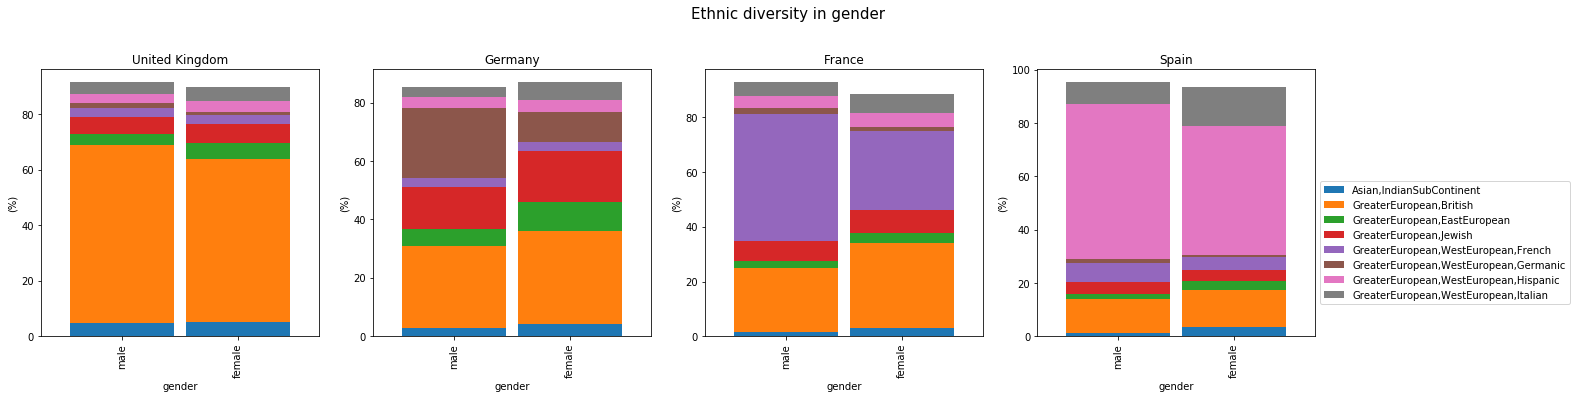

In [40]:
fig = plt.figure(figsize=(22, 5))
gs = gridspec.GridSpec(1,4)
for i, country in enumerate(degree_gender.index.levels[0][:4]):
    ax = plt.subplot(gs[0,i])
    country_race_gender.loc[country][[v for v in df[df.country=='Spain'].race.value_counts().index.values[:8]]].unstack('race').loc[['male', 'female']].plot(kind='bar', width=0.9, ax=ax, stacked=True, legend=False)
    ax.set_title('{}'.format(country))
    ax.set_ylabel('(%)')
    
    if i == 3:
        ax.legend(bbox_to_anchor=(1, 0.6))

plt.suptitle('Ethnic diversity in gender', fontsize=15, y=1.1)
plt.tight_layout()
plt.show()

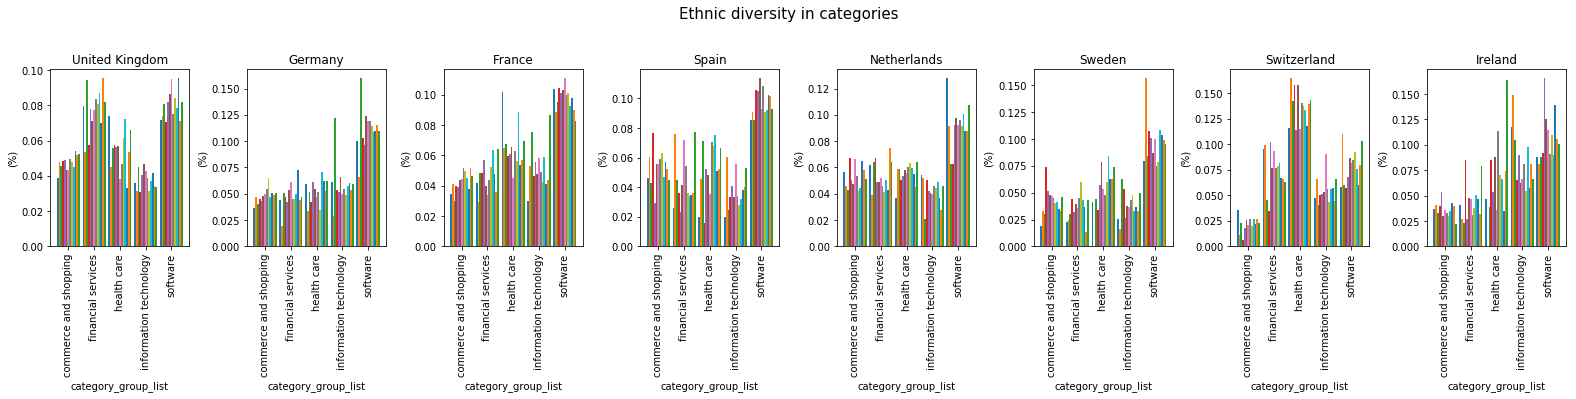

In [99]:
cats = df.drop_duplicates('org_id')['category_group_list'].value_counts().index[:5]
fig = plt.figure(figsize=(22, 5))
gs = gridspec.GridSpec(1,8)
for i, country in enumerate(degree_gender.index.levels[0][:8]):
    ax = plt.subplot(gs[0,i])
    cat_comp_ethnicity.loc[country].loc[cats].unstack('race').plot(kind='bar', width=0.9, ax=ax, legend=False)
    ax.set_title('{}'.format(country))
    ax.set_ylabel('(%)')

plt.suptitle('Ethnic diversity in categories', fontsize=15, y=1.1)
plt.tight_layout()
plt.show()

### Indicators 11 & 12

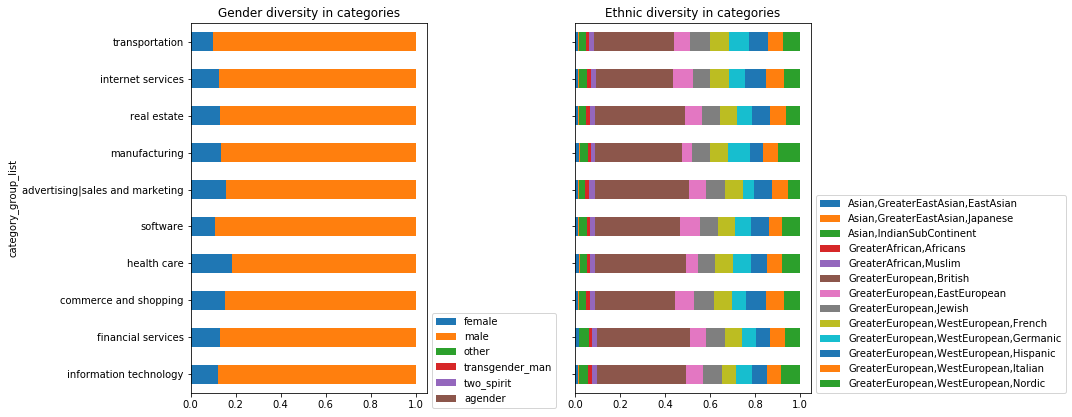

In [18]:
fig = plt.figure(figsize=(15, 6))
gs = gridspec.GridSpec(1,2)
idx = df.drop_duplicates('org_id')['category_group_list'].value_counts().index[:10]
i = pd.IndexSlice
# ax1
ax1 = plt.subplot(gs[0,0])
# cg = cat_gender / cat_gender.groupby('category_group_list').sum()
cat_gender.reindex(idx, level=0).loc[i[idx[:10], :], ].unstack().plot(kind='barh', stacked=True, ax=ax1)
ax1.set_title('Gender diversity in categories', fontsize=12)
ax1.legend(bbox_to_anchor=(1, 0.23))

# ax2
ax2 = plt.subplot(gs[0,1])
# ce = cat_ethnicity / cat_ethnicity.groupby('category_group_list').sum()
cat_ethnicity.reindex(idx, level=0).loc[i[idx[:10], :], ].unstack().plot(kind='barh', stacked=True, ax=ax2)
ax2.set_title('Ethnic diversity in categories', fontsize=12)
ax2.set_yticklabels([])
ax2.set_ylabel('')
ax2.legend(bbox_to_anchor=(1, 0.55))

plt.tight_layout()
plt.show()

### Indicators 13 & 14

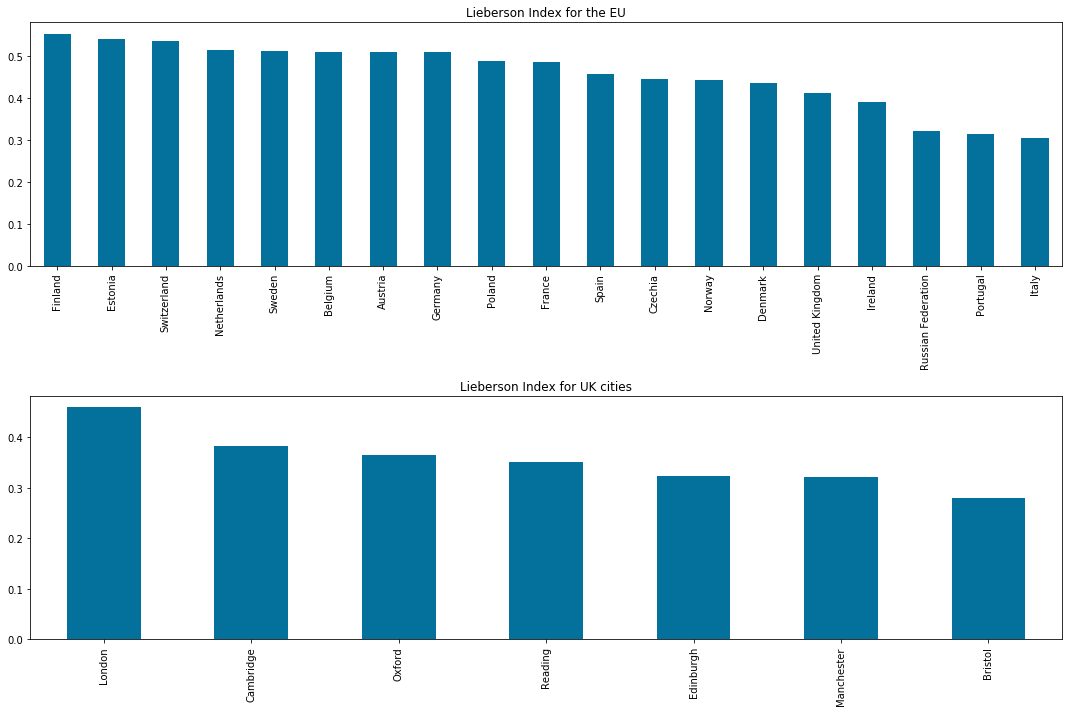

In [19]:
fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(2,1)

ax1 = plt.subplot(gs[0,:])
pd.DataFrame.from_dict(lieberson_index_countries, orient='index').sort_values(0, ascending=False).plot(kind='bar', ax=ax1, color='xkcd:ocean blue', legend=False)
ax1.set_title('Lieberson Index for the EU', fontsize=12)

ax2 = plt.subplot(gs[1,:])
pd.DataFrame.from_dict(lieberson_index_cities, orient='index').sort_values(0, ascending=False)[:20].plot(kind='bar', ax=ax2, color='xkcd:ocean blue', legend=False)
ax2.set_title('Lieberson Index for UK cities', fontsize=12)

plt.tight_layout()
plt.show()

### Indicator 15

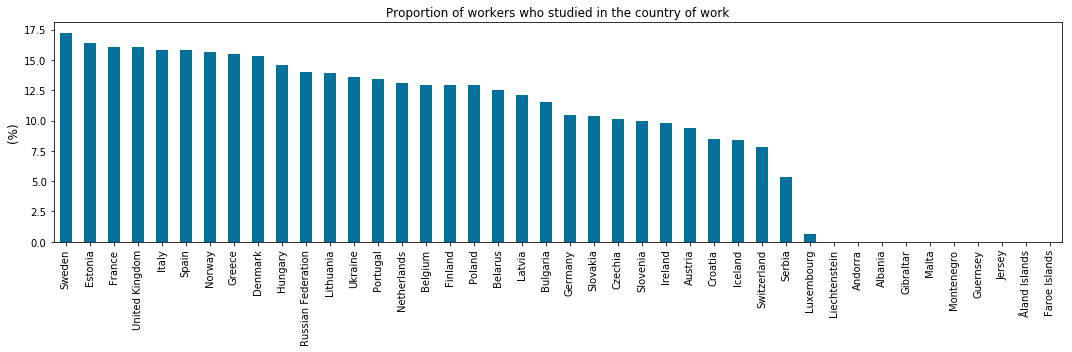

In [20]:
f, ax = plt.subplots(ncols=1, figsize=(15,5))

pd.DataFrame.from_dict(work_and_study_place, orient='index').sort_values(0, ascending=False).plot(kind='bar', color='xkcd:ocean blue', legend=False, ax=ax)
ax.set_title('Proportion of workers who studied in the country of work', fontsize=12)
ax.set_ylabel('(%)', fontsize=12)

plt.tight_layout()
plt.show()

### Indicators 16, 17, 18 & 19

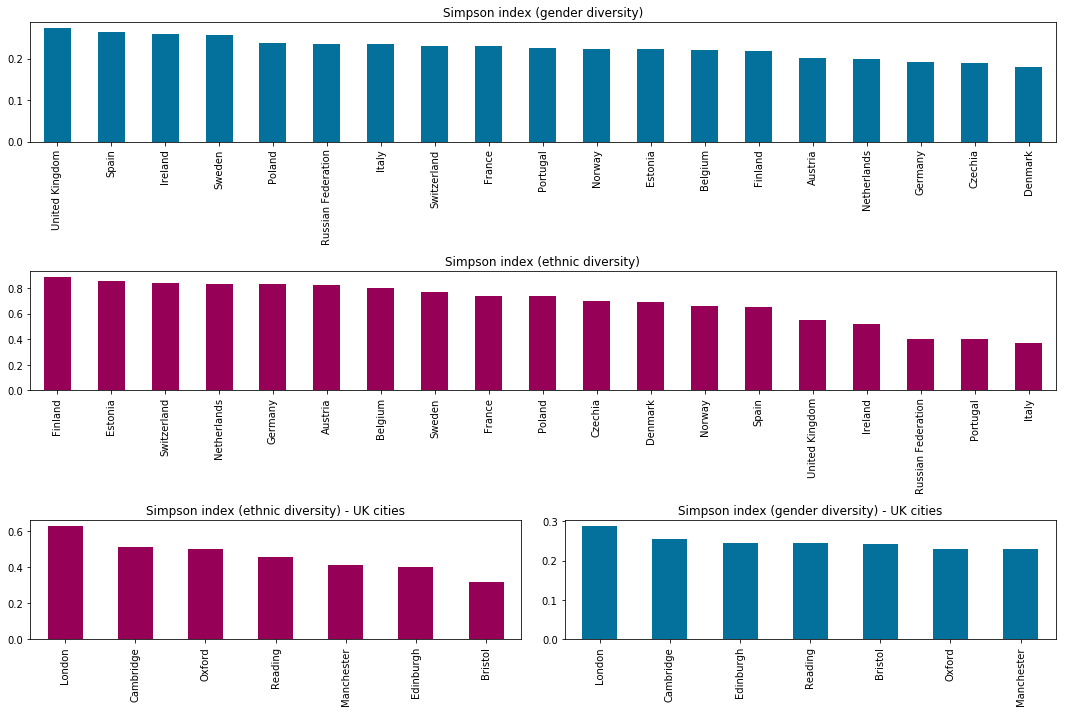

In [21]:
fig = plt.figure(figsize=(15,10))
gs = gridspec.GridSpec(3,2)

# ax1
ax1 = plt.subplot(gs[0,:])
pd.DataFrame.from_dict(simpson_gender_country, orient='index').sort_values(by=0, ascending=False).plot(kind='bar', legend=False, color='xkcd:ocean blue', ax=ax1)
ax1.set_title('Simpson index (gender diversity)', fontsize=12)

# ax2
ax2 = plt.subplot(gs[1,:])
pd.DataFrame.from_dict(simpson_ethnic_country, orient='index').sort_values(by=0, ascending=False).plot(kind='bar', legend=False, color='xkcd:dark magenta', ax=ax2)
ax2.set_title('Simpson index (ethnic diversity)', fontsize=12)

# ax3
ax3 = plt.subplot(gs[2,0])
pd.DataFrame.from_dict(simpson_ethnic_city, orient='index').sort_values(by=0, ascending=False).plot(kind='bar', legend=False, color='xkcd:dark magenta', ax=ax3)
ax3.set_title('Simpson index (ethnic diversity) - UK cities', fontsize=12)

# ax4
ax4 = plt.subplot(gs[2,1])
pd.DataFrame.from_dict(simpson_gender_city, orient='index').sort_values(by=0, ascending=False).plot(kind='bar', legend=False, color='xkcd:ocean blue', ax=ax4)
ax4.set_title('Simpson index (gender diversity) - UK cities', fontsize=12)

plt.tight_layout()
plt.show()

In [41]:
# Geometry, shapefiles and projections
import fiona
import geopandas as gpd
from shapely.geometry import shape
from shapely.geometry import Point
import pyproj
from numpy import inf
# import pickle
# import pandas as pd
# from collections import Counter
# import numpy as np
# import matplotlib.pyplot as plt 
from descartes import PolygonPatch
from matplotlib.collections import PatchCollection
import matplotlib as mpl

%matplotlib inline

In [42]:
# Read SHP data
shp_filename = '/Users/konstantinosstathoulopoulos/Downloads/Travel_to_Work_Areas_December_2011_Full_Clipped_Boundaries_in_United_Kingdom 2/Travel_to_Work_Areas_December_2011_Full_Clipped_Boundaries_in_United_Kingdom.shp'
shapes = gpd.GeoDataFrame.from_file(shp_filename)
shapes.crs = {"init": "epsg:27700"}

# Generate a function to create a UK East/North point from Lon/Lat
wgs84 = pyproj.Proj(init = 'epsg:4326')
ukgrid = pyproj.Proj(init = 'epsg:27700')
EnPoint = lambda lng, lat : Point(*pyproj.transform(wgs84, ukgrid, lng, lat))

In [44]:
country_gender.unstack('gender').iloc[:15]

gender,agender,androgynous,female,gender_fluid,gender_nonconforming,male,neutrois,other,transgender_man,two_spirit
country,,,,,,,,,,
United Kingdom,0.002184,0.002184,16.874468,0.002184,0.002184,79.950652,NaN,NaN,NaN,NaN
Germany,0.006908,NaN,11.709845,NaN,NaN,85.354059,NaN,NaN,NaN,0.006908
France,NaN,NaN,13.322151,NaN,NaN,83.111150,NaN,NaN,NaN,NaN
Spain,0.011773,NaN,15.987756,NaN,NaN,79.927007,NaN,0.011773,NaN,NaN
Netherlands,NaN,NaN,11.432706,NaN,NaN,85.021708,NaN,NaN,NaN,NaN
Sweden,NaN,NaN,15.726073,NaN,NaN,81.798680,NaN,NaN,NaN,NaN
Switzerland,NaN,NaN,13.216297,NaN,NaN,83.554157,NaN,NaN,NaN,NaN
Ireland,NaN,NaN,16.447876,NaN,NaN,80.907336,NaN,NaN,0.019305,NaN
Italy,NaN,NaN,13.953488,NaN,NaN,83.066860,NaN,NaN,NaN,NaN


In [50]:
gender_city_uk = ind.people_diversity('city', 'gender')

In [52]:
idx = pd.IndexSlice
gender_city_uk.loc[idx[df[df.country=='United Kingdom'].city.unique(), ['male', 'female']]]

city                 gender
London               female     17.964866
                     male       78.886311
Cambridge            female     15.796998
                     male       80.271623
Manchester           female     13.274336
                     male       84.070796
Edinburgh            female     14.955640
                     male       82.509506
Bristol              female     15.833333
                     male       82.291667
Oxford               female     14.132762
                     male       82.441113
Leeds                female     16.120907
                     male       81.612091
Glasgow              female     21.188630
                     male       74.677003
Birmingham           female     13.223140
                     male       84.297521
Reading              female     15.193370
                     male       82.596685
Nottingham           female     18.649518
                     male       79.742765
Newcastle Upon Tyne  female     14.022140
      

In [ ]:
ac['geometry'] = [EnPoint(ac.loc[i, 'lng'], ac.loc[i, 'lat']) for i in range(ac.shape[0])]
ac.crs = {"init": "epsg:27700"}

In [ ]:
patches = []
color = []

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,8)) 

companies.sort_values('Companies', ascending=False).iloc[:25].plot(kind='barh', ax=ax1, color='xkcd:dark blue', legend=False)
ax1.set_title('Number of companies', fontsize=15)

for i in shapes.index:
    patches.append(PolygonPatch(shapes.loc[i, 'geometry'], alpha=0.5, zorder=4))
    try:
        color.append(total_funding.loc[i+1].values[0])
    except KeyError as e:
        color.append(0)

scaled_color = np.log(color)
scaled_color[scaled_color == -inf] = 0
p = PatchCollection(patches, cmap=plt.cm.viridis, match_original=True)
p.set_array(scaled_color)
ax2.add_collection(p)
ax2.set_title('Level of funding', fontsize=15)
ax2.set_yticklabels([])
ax2.set_xticklabels([])
# ax2.axis('off')
# ax2.set_axis_off()
ax2.axis('scaled')

cax = fig.add_axes([0.91, 0.28, 0.02, 0.45])
cb = mpl.colorbar.ColorbarBase(cax, cmap=plt.cm.viridis, spacing='proportional', ticks=[-1, 0, 1])
cb.ax.set_yticklabels(['0', '110'])#.format(int(max(color)))]) 

cb.set_label("Funding (£)", labelpad=12, fontsize=12, rotation=270)

fig.savefig('/Users/konstantinosstathoulopoulos/Desktop/ttwa_company_count_and_map.pdf')

plt.show()